# Heart Disease Classification

From this analysis, I will predict heart disease using classification which Logistic Regression, Dummy Classifier, K-Nearest Neighbors, Support Vector Machine, and Decision Tree Classifier.

Before we go further, I'd like to tell you if I got this dataset from <a href="https://archive.ics.uci.edu/ml/datasets/Heart+Disease">here</a>. So let's get started on it.

In [1]:
# Import Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Load the data using pandas

df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Data contains;

- `age` - age in years
- `sex` - (1 = male; 0 = female)
- `cp` - chest pain type
- `trestbps` - resting blood pressure (in mm Hg on admission to the hospital)
- `chol` - serum cholestoral in mg/dl
- `fbs` - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- `restecg` - resting electrocardiographic results
- `thalach` - maximum heart rate achieved
- `exang` - exercise induced angina (1 = yes; 0 = no)
- `oldpeak` - ST depression induced by exercise relative to rest
- `slope` - the slope of the peak exercise ST segment
- `ca` - number of major vessels (0 - 3) colored by flourosopy
- `thal` - 3 = normal; 6 = fixed defect; 7 = reversable defect
- `target` - have disease or not (1 = yes, 0 = no)

### Data Exploration

In [3]:
df.shape

(303, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

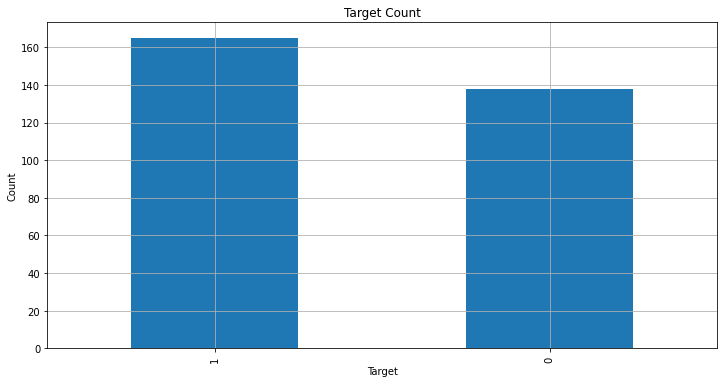

In [7]:
df['target'].value_counts().plot(kind = 'bar', figsize = (12, 6))
plt.title('Target Count')
plt.grid()
plt.ylabel('Count')
plt.xlabel('Target')
plt.show()

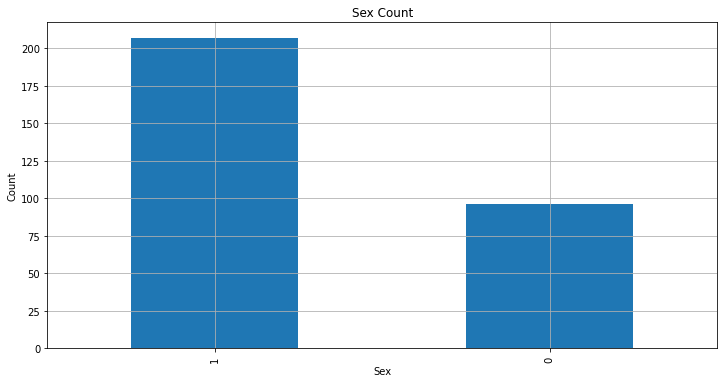

In [8]:
df['sex'].value_counts().plot(kind = 'bar', figsize = (12, 6))
plt.title('Sex Count')
plt.grid()
plt.ylabel('Count')
plt.xlabel('Sex')
plt.show()

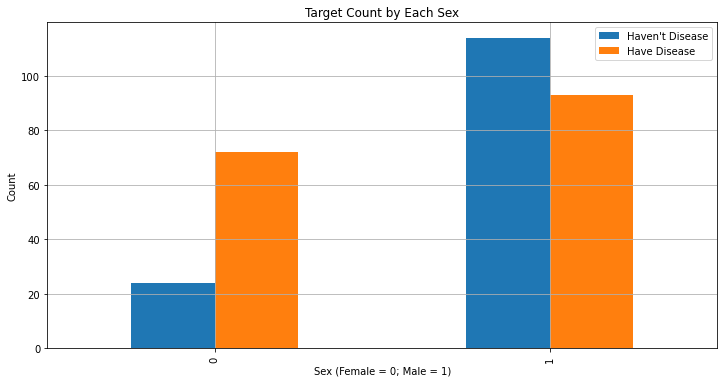

In [9]:
pd.crosstab(df['sex'], df['target']).plot(kind = 'bar', figsize = (12, 6))
plt.title('Target Count by Each Sex')
plt.grid()
plt.legend(["Haven't Disease", "Have Disease"])
plt.xlabel('Sex (Female = 0; Male = 1)')
plt.ylabel('Count')
plt.show()

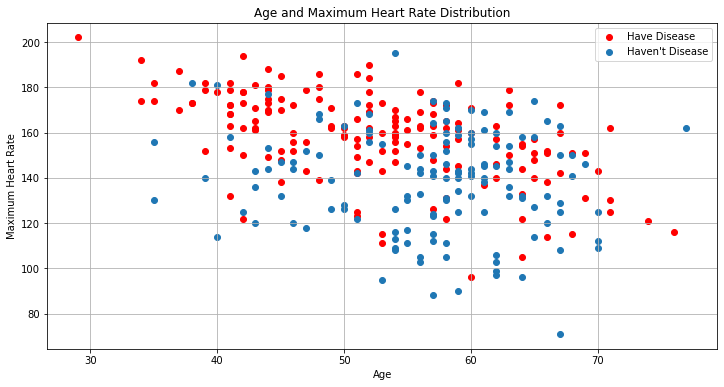

In [10]:
plt.figure(figsize = (12, 6))
plt.scatter(x = df['age'][df['target'] == 1], y = df['thalach'][df['target'] == 1], color = 'red')
plt.scatter(x = df['age'][df['target'] == 0], y = df['thalach'][df['target'] == 0])
plt.grid()
plt.legend(["Have Disease", "Haven't Disease"])
plt.title('Age and Maximum Heart Rate Distribution')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.show()

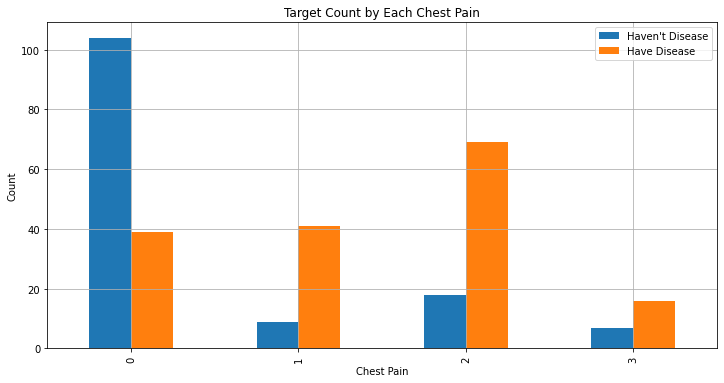

In [11]:
pd.crosstab(df['cp'], df['target']).plot(kind = 'bar', figsize = (12, 6))
plt.grid()
plt.title('Target Count by Each Chest Pain')
plt.xlabel('Chest Pain')
plt.ylabel('Count')
plt.legend(["Haven't Disease", "Have Disease"])
plt.show()

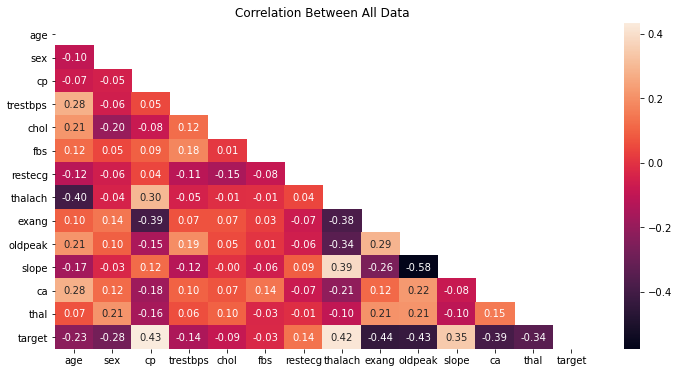

In [12]:
plt.figure(figsize = (12, 6))
sns.heatmap(df.corr(), annot = True, mask = np.triu(df.corr()), fmt = '.2f')
plt.title('Correlation Between All Data')
plt.show()

### Build the Model

In [13]:
X = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = df['target']

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

###### Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, jaccard_score, f1_score, classification_report

LR = LogisticRegression(C = 0.01, solver = 'liblinear')
LR.fit(X_train, y_train)

LogisticRegression(C=0.01, solver='liblinear')

In [16]:
LRPredict = LR.predict(X_test)

In [17]:
# Evaluate the Model

print(f'Logistic Regression Classification Report:\n{classification_report(y_test, LRPredict)}')
print(f'Logistic Regression F1-Score: {round(f1_score(y_test, LRPredict), 2)}')
print(f'Logistic Regression Jaccard score: {round(jaccard_score(y_test, LRPredict), 2)}')
print(f'Logistic Regression Logarithmic Loss: {round(log_loss(y_test, LRPredict), 2)}')

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.85        35
           1       0.86      0.90      0.88        41

    accuracy                           0.87        76
   macro avg       0.87      0.87      0.87        76
weighted avg       0.87      0.87      0.87        76

Logistic Regression F1-Score: 0.88
Logistic Regression Jaccard score: 0.79
Logistic Regression Logarithmic Loss: 4.54


##### Dummy Classifier

In [18]:
from sklearn.dummy import DummyClassifier


DClassifier = DummyClassifier(strategy = 'uniform')
DClassifier.fit(X_train, y_train)

DummyClassifier(strategy='uniform')

In [19]:
DClassifierPred = DClassifier.predict(X_test)

In [20]:
# Evaluate the Model

print(f'Dummy Classifier Classification Report:\n{classification_report(y_test, DClassifierPred)}')
print(f"Dummy Classifier F1-Score: {round(f1_score(y_test, DClassifierPred), 2)}")
print(f'Dummy Classifier Jaccard Score: {round(jaccard_score(y_test, DClassifierPred), 2)}')

Dummy Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.51      0.50        35
           1       0.56      0.54      0.55        41

    accuracy                           0.53        76
   macro avg       0.53      0.53      0.53        76
weighted avg       0.53      0.53      0.53        76

Dummy Classifier F1-Score: 0.55
Dummy Classifier Jaccard Score: 0.38


##### K-Nearest Neighbors

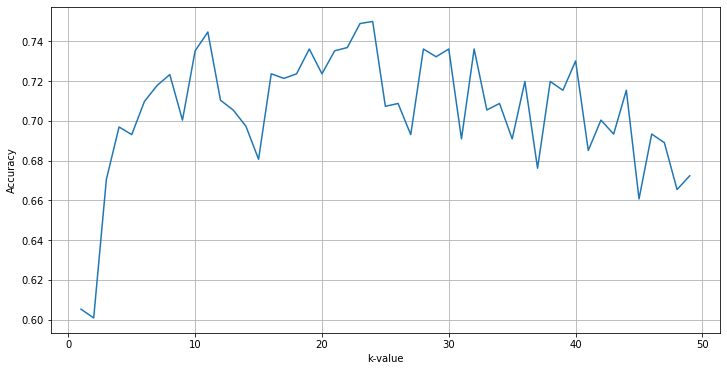

The maximum accuracy has reached in k-value: 24


In [21]:
from sklearn.neighbors import KNeighborsClassifier

# Looking for the best k-value

scores = []
for x in range(1,50):
    Classifier = KNeighborsClassifier(n_neighbors = x)
    Classifier.fit(X_train, y_train.ravel())
    KNNPredict = Classifier.predict(X_test)
    scores.append(f1_score(y_test, KNNPredict, average='macro'))
plt.figure(figsize=(12, 6))
plt.plot(range(1,50), scores)
plt.grid()
plt.ylabel('Accuracy')
plt.xlabel('k-value')
plt.show()
print("The maximum accuracy has reached in k-value:", scores.index(max(scores))+1)

In [22]:
ClassifierKNN = KNeighborsClassifier(n_neighbors = 24, metric = 'euclidean')
ClassifierKNN.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=24)

In [23]:
KNNPredictMax = ClassifierKNN.predict(X_test)

In [24]:
# Evaluate the Model

print(f'KNN Classification Report:\n{classification_report(y_test, KNNPredictMax)}')
print(f'KNN F1-score: {round(f1_score(y_test, KNNPredictMax), 2)}')
print(f'KNN Jaccard Score: {round(jaccard_score(y_test, KNNPredictMax), 2)}')

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.80      0.75        35
           1       0.81      0.71      0.75        41

    accuracy                           0.75        76
   macro avg       0.75      0.75      0.75        76
weighted avg       0.76      0.75      0.75        76

KNN F1-score: 0.75
KNN Jaccard Score: 0.6


##### Support Vector Machine

In [25]:
from sklearn.svm import SVC

svm = SVC(kernel = 'linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [26]:
SVMPredict = svm.predict(X_test)

In [27]:
# Evaluate the Model

print(f'SVM Classification Report:\n{classification_report(y_test, SVMPredict)}')
print(f'SVM F1-score: {round(f1_score(y_test, SVMPredict), 2)}')
print(f'SVM Jaccard score: {round(jaccard_score(y_test, SVMPredict), 2)}')

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.85        35
           1       0.86      0.90      0.88        41

    accuracy                           0.87        76
   macro avg       0.87      0.87      0.87        76
weighted avg       0.87      0.87      0.87        76

SVM F1-score: 0.88
SVM Jaccard score: 0.79


##### Decision Tree Classifier

In [28]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)

DecisionTreeClassifier()

In [29]:
DTCPredict = DTC.predict(X_test)

In [30]:
# Evaluate the Model

print(f'Decision Tree Classifier Classification Report: {classification_report(y_test, DTCPredict)}')
print(f'Decision Tree Classifier F1-score: {round(f1_score(y_test, DTCPredict), 2)}')
print(f'Decision Tree Classifier Jaccard score: {round(jaccard_score(y_test, DTCPredict), 2)}')

Decision Tree Classifier Classification Report:               precision    recall  f1-score   support

           0       0.72      0.74      0.73        35
           1       0.78      0.76      0.77        41

    accuracy                           0.75        76
   macro avg       0.75      0.75      0.75        76
weighted avg       0.75      0.75      0.75        76

Decision Tree Classifier F1-score: 0.77
Decision Tree Classifier Jaccard score: 0.62


### Confusion Matrix

In [31]:
from sklearn.metrics import confusion_matrix

LRCM = confusion_matrix(y_test, LRPredict)
DCCM = confusion_matrix(y_test, DClassifierPred)
KNNCM = confusion_matrix(y_test, KNNPredictMax)
SVMCM = confusion_matrix(y_test, SVMPredict)
DTCCM = confusion_matrix(y_test, DTCPredict)

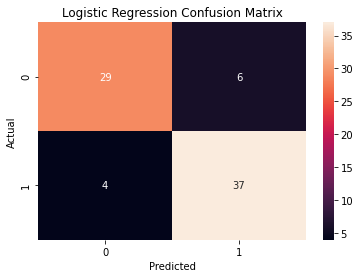

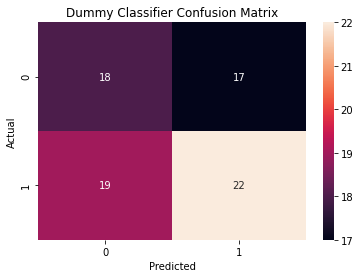

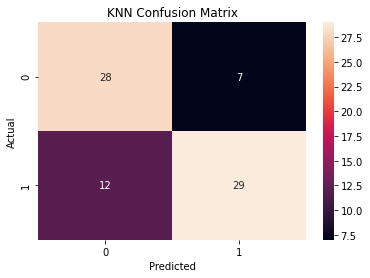

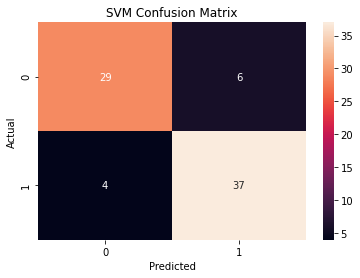

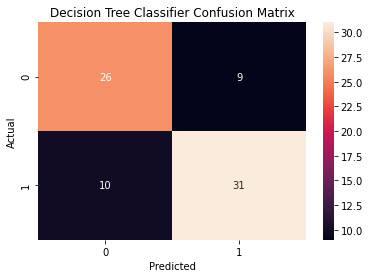

In [32]:
# Logistic Regression

sns.heatmap(LRCM, annot = True)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Dummy Classifier

sns.heatmap(DCCM, annot = True)
plt.title('Dummy Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# K-Nearest Neighbors

sns.heatmap(KNNCM, annot = True)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Support Vector Machine

sns.heatmap(SVMCM, annot = True)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Decision Tree Classifier

sns.heatmap(DTCCM, annot = True)
plt.title('Decision Tree Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Evaluation

In [33]:
Evaluation = pd.DataFrame({'Classification': ['Logistic Regression', 'Dummy Classifier', 'K-Nearest Neighbor', 'Support Vector Machine', 'Decision Tree Classifier'],
                           'F1-Score': [round(f1_score(y_test, LRPredict), 2), round(f1_score(y_test, DClassifierPred), 2), round(f1_score(y_test, KNNPredictMax), 2), round(f1_score(y_test, SVMPredict), 2), round(f1_score(y_test, DTCPredict), 2)],
                           'Jaccard Score': [round(jaccard_score(y_test, LRPredict), 2), round(jaccard_score(y_test, DClassifierPred), 2), round(jaccard_score(y_test, KNNPredictMax), 2), round(jaccard_score(y_test, SVMPredict), 2), round(jaccard_score(y_test, DTCPredict), 2)],
                           'Logarithmic Loss': [round(log_loss(y_test, LRPredict), 2), np.nan, np.nan, np.nan, np.nan]}).sort_values(by = 'F1-Score', 
                           ascending = False)
Evaluation

,Classification,F1-Score,Jaccard Score,Logarithmic Loss
0,Logistic Regression,0.88,0.79,4.54
3,Support Vector Machine,0.88,0.79,NaN
4,Decision Tree Classifier,0.77,0.62,NaN
2,K-Nearest Neighbor,0.75,0.60,NaN
1,Dummy Classifier,0.55,0.38,NaN


In [34]:
Evaluation.set_index('Classification', inplace = True)

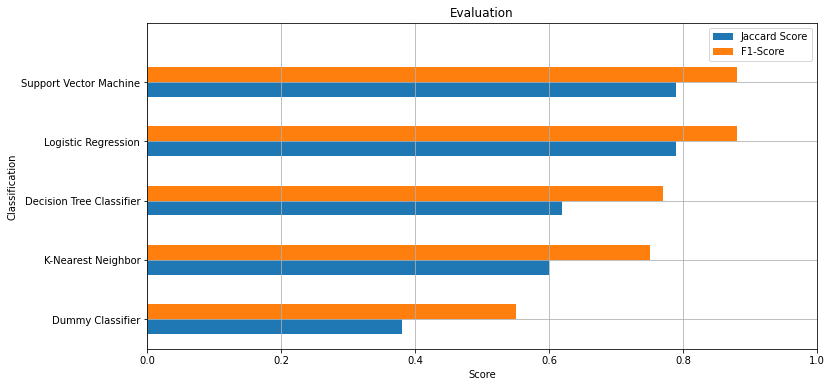

In [35]:
Evaluation[['Jaccard Score', 'F1-Score']].sort_values(by = 'F1-Score', ascending = True).plot(kind = 'barh', figsize = (12, 6))
plt.title('Evaluation')
plt.axis([0, 1, -0.5, 5])
plt.grid()
plt.xlabel('Score')
plt.ylabel('Classification')
plt.show()

### Conclusion

From the analysis above, we know that we can analyze Heart Disease using Logistic Regression or Support Vector Machine because the model gave us a good F1-Score and Jaccard Score. If we use Logistic Regression, we got 0.88 F1-Score and 0.79 Jaccard Score. And also if we use Support Vector Machine, it will give us the same result which is 0.88 F1-Score and 0.79 Jaccard Score.